In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os, os.path, pickle, sys

from scipy import stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, Normalize

from matplotlib import cm

from datetime import datetime

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/Ehsan/wheat/"
wheat_reOrganized = data_dir_base + "wheat_reOrganized/"

wheat_plot_dir = data_dir_base + "plots/"
dgdd_plot_dir  = wheat_plot_dir + "dGDD_precip/"
gdd_plot_dir   = wheat_plot_dir + "GDD_precip/"

period_figures_dir = wheat_plot_dir + "period_figures/"
os.makedirs(period_figures_dir, exist_ok=True)

In [3]:
dpi_ = 300

In [4]:
def plot_stages_in_color_w_text(axes):
    axes.set_xlim(14, 140)
    axes.set_ylim(0, 30)
    y_text=2
    # Germination
    x1, x2 = 15, 20
    axes.axvspan(x1, x2, color='palegreen'); #facecolor='.01', alpha=0.2
    axes.text(x=(x1+x2)/2-1, y=1, s=f'Germination & Emergence', rotation=90,
              fontdict={'fontsize':15, 'fontweight':'bold', 'color':'black'});

    # Tillering
    x1, x2 = 30, 40 #,y_text= 10
    axes.axvspan(x1, x2, color=mcolors.TABLEAU_COLORS['tab:olive']);
    axes.text(x=(x1+x2)/2-2, y=y_text, s=f'Tillering', rotation=90,
              fontdict={'fontsize':20, 'fontweight':'bold',  'color':'black'});

    # Heading
    x1, x2 = 60, 70 #, y_text = 10
    axes.axvspan(x1, x2, color="darkgreen");
    axes.text(x=(x1+x2)/2 - 2, y=y_text, s=f'Heading', rotation=90,
              fontdict={'fontsize':20, 'fontweight':'bold','color':'white'});

    # Flowering
    x1, x2 = 85, 90 #, y_text = 10
    axes.axvspan(x1, x2, color='navajowhite');
    axes.text(x=(x1+x2)/2 - 1.5, y=y_text, s=f'Flowering', rotation=90,
              fontdict={'fontsize':20, 'fontweight':'bold'});

    # Grain Filling
    x1, x2 = 120, 125 #y_text = 7
    axes.axvspan(x1, x2, color='yellow');
    axes.text(x=(x1+x2)/2 - 1, y=y_text, s=f'Grain Filling', rotation=90,
              fontdict={'fontsize':20, 'fontweight':'bold', 'color':'black'});

    # Maturity
    x1, x2 = 135, 140 # , y_text=10
    axes.axvspan(x1, x2, color='lightyellow');
    axes.text(x=(x1+x2)/2 - 1.5, y=y_text, s=f'Maturity', rotation=90,
              fontdict={'fontsize':20, 'fontweight':'bold', 'color':'black'});

    axes.set_xlabel('days after planting date');
    # axes.axhline(y=7, color='r', linestyle='-')
    tickss_ = [15, 20, 30, 40, 60, 70, 85, 90, 120, 125, 135, 140]
    axes.set_xticks(tickss_, tickss_);
    
def plot_stages_in_color_no_text(ax_):
    x1, x2 = 15, 20 # Germination
    ax_.axvspan(x1, x2, color='palegreen');

    x1, x2 = 30, 40 # Tillering
    ax_.axvspan(x1, x2, color=mcolors.TABLEAU_COLORS['tab:olive']);

    x1, x2 = 60, 70 # Heading
    ax_.axvspan(x1, x2, color="darkgreen");

    x1, x2 = 85, 90 # Flowering
    ax_.axvspan(x1, x2, color='navajowhite');

    x1, x2 = 120, 125 # Grain Filling
    ax_.axvspan(x1, x2, color='yellow');

    x1, x2 = 135, 140 # Maturity
    ax_.axvspan(x1, x2, color='lightyellow');

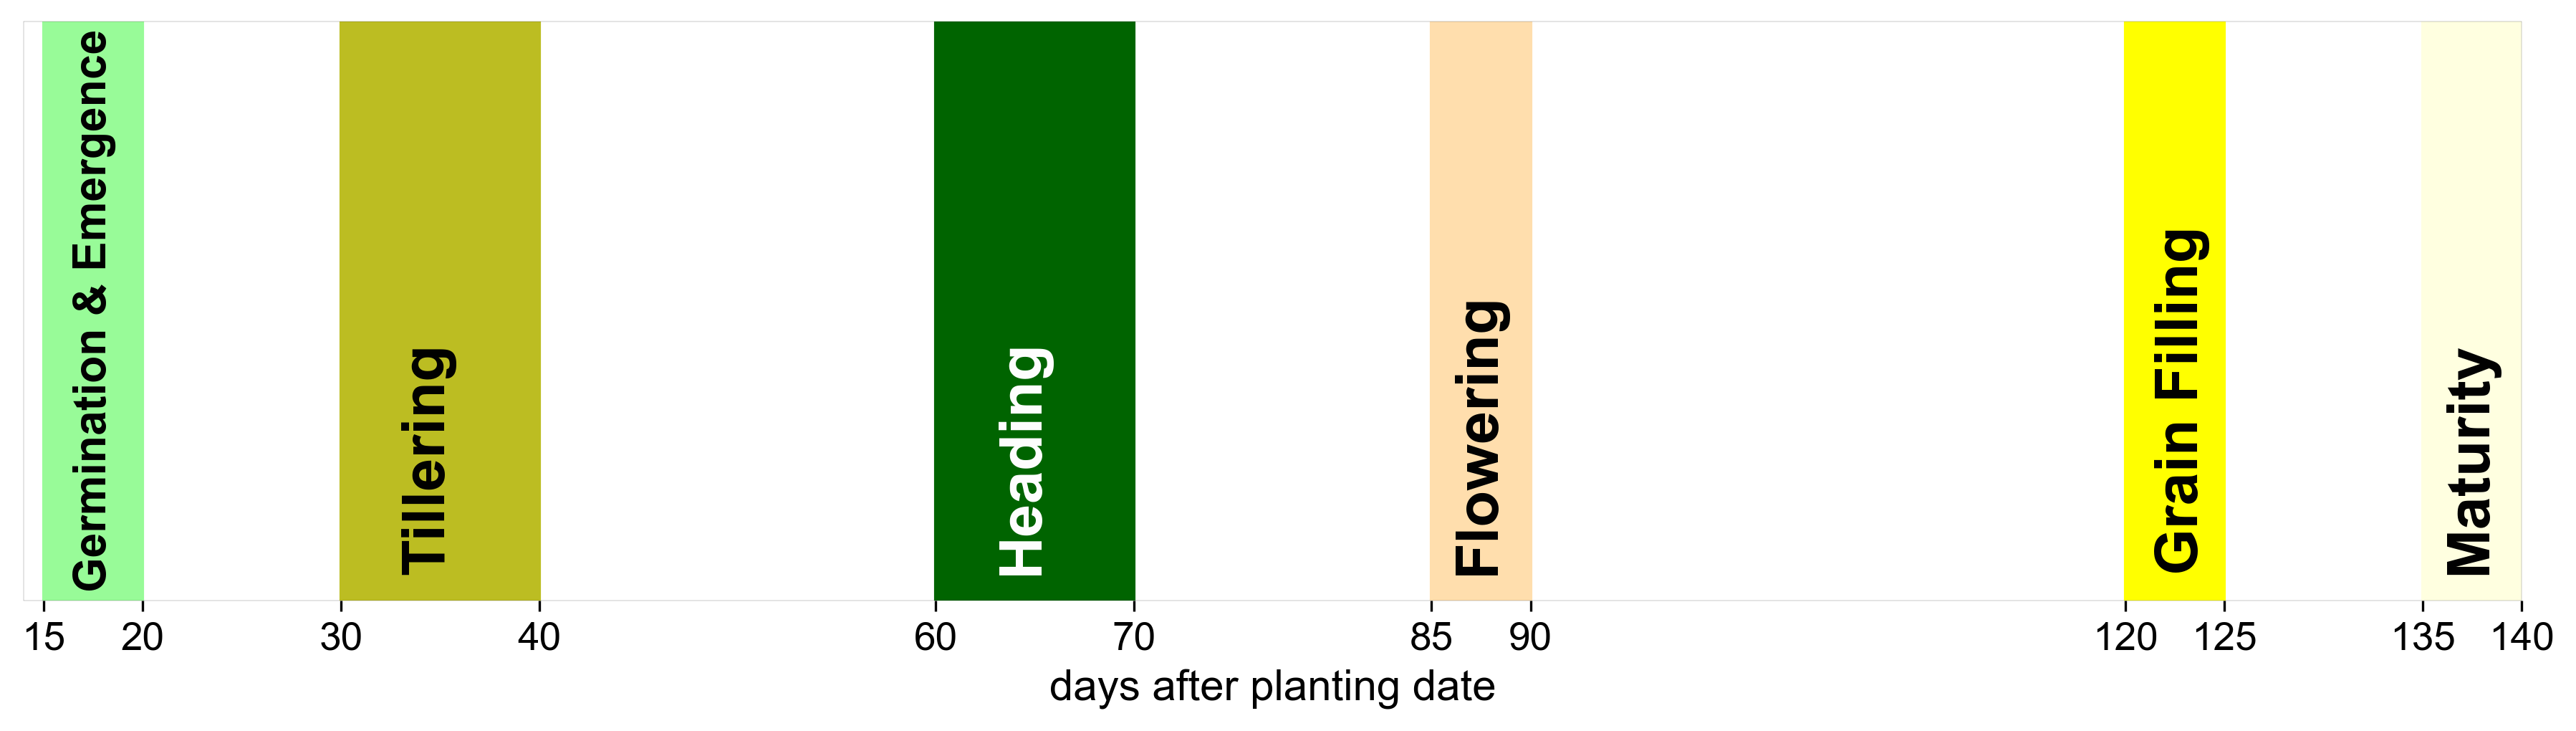

In [5]:
tick_legend_FontSize = 12
params = {"font.family": "Arial",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": False,
          "xtick.labelbottom": True,
          "ytick.labelleft": False,
         'axes.linewidth' : .05}

plt.rcParams.update(params)

fig, ax = plt.subplots(1, 1, figsize=(15, 3.5),
                         gridspec_kw={"hspace": 0.15, "wspace": 0.15}, dpi=dpi_)

plot_stages_in_color_w_text(ax)

fig_name = period_figures_dir + "growing_stages"
plt.savefig(fig_name + ".pdf", bbox_inches='tight', dpi=dpi_)
plt.savefig(fig_name + ".jpg", bbox_inches='tight', dpi=dpi_)

In [6]:
# Define line properties for each subplot
thick_order, thin_order = 0, 3
thick_w, thin_w = 10, 2
thick_c, thin_c = "red", "black"

lines_properties = [
    # For Subplot 1
    {'y': [-0.75, -0.5, 0] * 2, 
     'x_start': [8, 9, 33, 21, 22, 73], 
     'x_end': [60, 61, 143, 93, 94, 120],
     'colors': list(np.repeat([thin_c, thick_c], 3)), 
     'linewidths': np.repeat([thin_w, thick_w], 3),
     'labels': ['PR (8-60)', 'PRDTR (9-61)', 'SRAD (33-143)', None, None, None], 
     'points': {'x': [34, 35, 88], 'y': [-0.75, -0.5, 0]}},  # Add a point at (45, 0.5)
    # For Subplot 2
    {'y': [-0.25, 0, 0.25] * 2, 
     'x_start': [9, 7, 7, 8, 8, 8], 
     'x_end': [61, 21, 105, 90, 79, 90],
     'colors': list(np.repeat([thin_c, thick_c], 3)), 
     'linewidths': np.repeat([thin_w, thick_w], 3), 
     'labels': ['GDD (9-61)', 'SRAD (7-21)', 'VPD (7-105)', None, None, None], 
     'points': {'x': [35, 14, 56], 'y': [-0.25, 0, 0.25]}},  # Add points
    # For Subplot 3
    {'y': [-0.75, -0.5, 0] * 2, 
     'x_start': [7, 13, 32, 19, 18, 50], 
     'x_end': [67, 145, 140, 98, 100, 115],
     'colors': list(np.repeat([thin_c, thick_c], 3)), 
     'linewidths': np.repeat([thin_w, thick_w], 3), 
     'labels': ['PR (7-67)', 'PRDTR (13-145)', 'SRAD (32-140)', None, None, None], 
     'points': {'x': [37, 79, 86], 'y': [-0.75, -0.5, 0]}},  # No points for this subplot
    # For Subplot 4
    {'y': [0.5, 0.25] * 2, 
     'x_start': [35, 86, 27, 89], 
     'x_end': [41, 150, 57, 129],
     'colors': list(np.repeat([thin_c, thick_c], 2)), 
     'linewidths': np.repeat([thin_w, thick_w], 2), 
     'labels': ['RH (35-41)', 'VPD (86-150)', None, None], 
     'points': {'x': [38, 118], 'y': [0.5, 0.25]}}, # Add a point
    # For Subplot 5
    {'y': [-0.5, -0.53], 
     'x_start': [47, 48.75], 
     'x_end': [51, 49.25], 
     'colors': list(np.repeat([thin_c, thick_c], 1)), 
     'linewidths': [thin_w, thick_w], 
     'labels': ['PRDTR (47-51)', None], 
     'points': {'x': [49], 'y': [-0.5]}}  # Add points
]

In [7]:
tick_legend_FontSize = 2
params = {"font.family": "Arial",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
         'axes.linewidth' : .05}

plt.rcParams.update(params)

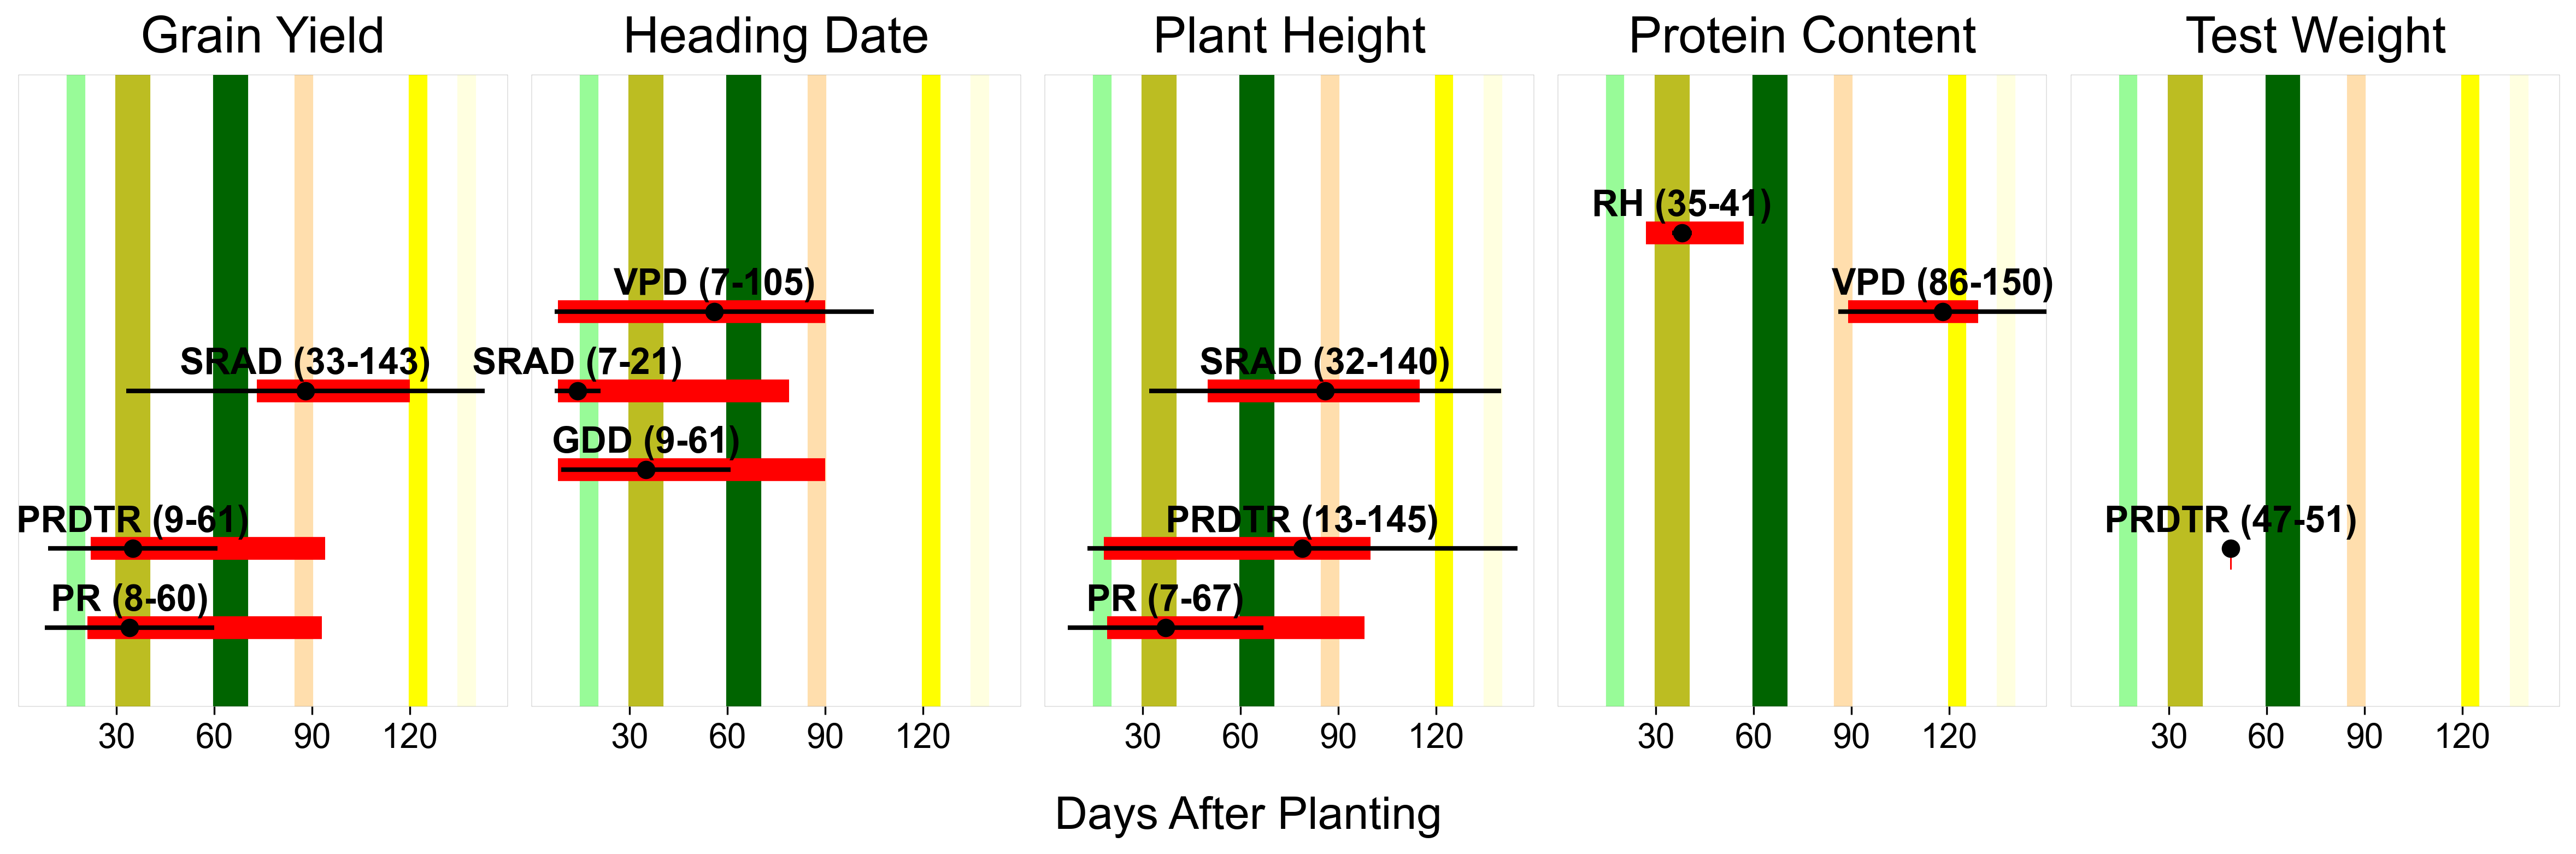

In [8]:
# Create a figure and axes with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 5), 
                         gridspec_kw={"hspace": 0.15, "wspace": 0.05}, dpi=dpi_)

# Manually define subplot titles
subplot_titles = ["Grain Yield", "Heading Date", "Plant Height", "Protein Content", "Test Weight"]

# Add horizontal lines, labels, and points to each subplot
for i, ax in enumerate(axes):
    props = lines_properties[i]
    for y, x_start, x_end, color, linewidth_, label in zip(
        props['y'], props['x_start'], props['x_end'], props['colors'], props['linewidths'], props['labels']
    ):
        # Draw the horizontal line with specified color and thickness
        if color == thick_c:
            ax.hlines(y=y, xmin=x_start, xmax=x_end, color=color, 
                      linestyle='-', linewidth=linewidth_, alpha=1)
        elif color == thin_c:
            ax.hlines(y=y, xmin=x_start, xmax=x_end, color=color, linestyle='-', linewidth=linewidth_, zorder=3)
        # Add the label if specified
        if label:
            midpoint_x = (x_start + x_end) / 2
            ax.text(midpoint_x, y + 0.03, label, color=color, ha='center', va='bottom', 
                    fontsize=16, fontweight='bold')
    # Add points if defined
    points = props.get('points', {})
    if points: # Add points with custom size and color
        ax.scatter(points['x'], points['y'], color=thin_c, s=50, label='Point', zorder=3)
    # Set specific x-axis ticks
    ax.set_xticks([30, 60, 90, 120])
    ax.set_xlim(0, 150)  # Adjust x-axis limits for better visualization
    ax.set_title(subplot_titles[i], fontsize=22)  # Set manual title
    ax.tick_params(axis='x', which='major', labelsize=15) # Increase tick label font size for x-axis only
    ax.set_yticks([])  # Remove y-axis ticks and labels
    ax.set_ylim(-1, 1)  # Set y-axis limits for better visualization
    plot_stages_in_color_no_text(ax)

# Add a common x-axis label
fig.supxlabel("days after planting".title(), fontsize=20, y=-0.05)  # Adjust `y` for spacing
# plt.tight_layout()
fig_name = period_figures_dir + "traits_windows_range"
plt.savefig(fig_name + ".pdf", bbox_inches='tight', dpi=dpi_)
plt.savefig(fig_name + ".jpg", bbox_inches='tight', dpi=dpi_)
plt.show()

In [ ]:


# Create a figure and axes with 1 row and 6 columns
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

# Define line properties for each subplot
lines_properties = [
    # For Subplot 1
    {'y': [0.0, 0.5, -0.03, 0.47], 
     'x_start': [8, 7, 21, 19], 
     'x_end': [60, 67, 93, 98],
     'colors': list(np.repeat([thin_c, thick_c], 2)), 
     'linewidths': np.repeat([thin_w, thick_w], 2), 
     'labels': ['Grain yield (8-60)', 'Plant height (7-67)', None, None], 
     'points': {'x': [34, 37], 'y': [0.0, 0.5]}},  # Add a point at (45, 0.5)
    # For Subplot 2
    {'y': [0.0, 0.5, 0.75, -0.03, 0.47, 0.73], 
     'x_start': [9, 13, 47, 22, 18, 48.75], 
     'x_end': [61, 145, 51, 94, 100, 49.25],
     'colors': list(np.repeat([thin_c, thick_c], 3)),
     'linewidths': np.repeat([thin_w, thick_w], 3), 
     'labels': ['Grain yield (9-61)', 'Plant height (13-145)', 'Test weight (47-51)', None, None, None], 
     'points': {'x': [35, 79, 49], 'y': [0.0, 0.5, 0.75]}},  # Add points
    # For Subplot 3
    {'y': [0.25, 0.23], 
     'x_start': [9, 8], 
     'x_end': [61, 90], 
     'colors': list(np.repeat([thin_c, thick_c], 1)), 
     'linewidths': np.repeat([thin_w, thick_w], 1), 
     'labels': ['Heading date (9-61)', None], 
     'points': {'x': [35], 'y': [0.25]}},  # No points for this subplot
    # For Subplot 4
    {'y': [0.0, 0.25, 0.5, -0.03, 0.23, 0.47], 
     'x_start': [33, 7, 32, 73, 8, 50], 
     'x_end': [143, 21, 140, 120, 79, 115],
     'colors': list(np.repeat([thin_c, thick_c], 3)), 
     'linewidths': np.repeat([thin_w, thick_w], 3), 
     'labels': ['Grain yield (9-61)', 'Heading date (7-21)', 'Plant height (32-140)', None, None, None], 
     'points': {'x': [86, 14, 86], 'y': [0.0, 0.25, 0.5]}},  # Add a point
    # For Subplot 5
    {'y': [0.25, -0.5, 0.23, -0.53], 
     'x_start': [7, 86, 8, 89], 
     'x_end': [105, 150, 90, 129],
     'colors': list(np.repeat([thin_c, thick_c], 2)), 
     'linewidths': np.repeat([thin_w, thick_w], 2), 
     'labels': ['Heading date (7-105)', 'Protein Content (86-150)', None, None], 
     'points': {'x': [56, 118], 'y': [0.25, -0.5]}},  # Add points
     # For Subplot 6
    {'y': [-0.5, -0.53], 
     'x_start': [35, 27], 
     'x_end': [41, 57], 
     'colors': list(np.repeat([thin_c, thick_c], 2)), 
     'linewidths': np.repeat([thin_w, thick_w], 1), 
     'labels': ['Protein Content (35-41)', None], 
     'points': {'x': [38], 'y': [-0.5]}}  # Add points

]

# Manually define subplot titles
subplot_titles = ["PR", "PRDTR", "GDD", "SRAD", "VPD", "RH"]

# Add horizontal lines, labels, and points to each subplot
for i, ax in enumerate(axes):
    props = lines_properties[i]
    for y, x_start, x_end, color, linewidth, label in zip(
        props['y'], props['x_start'], props['x_end'], props['colors'], props['linewidths'], props['labels']
    ):
        # Draw the horizontal line with specified color and thickness
        ax.hlines(y=y, xmin=x_start, xmax=x_end, color=color, linestyle='-', linewidth=linewidth)
        # Add the label if specified
        if label:
            midpoint_x = (x_start + x_end) / 2
            ax.text(midpoint_x, y + 0.03, label, color=color, 
                    ha='center', va='bottom', fontsize=18)
    # Add points if defined
    points = props.get('points', {})
    if points:
        ax.scatter(points['x'], points['y'], color='blue', s=20, label='Point')  # Add points with custom size and color
    # Set specific x-axis ticks
    ax.set_xticks([30, 60, 90, 120])
    ax.set_xlim(0, 150)  # Adjust x-axis limits for better visualization
    ax.set_title(subplot_titles[i], fontsize=18)  # Set manual title
    ax.tick_params(axis='x', which='major', labelsize=18)  # Increase tick label font size for x-axis only
    ax.set_yticks([])  # Remove y-axis ticks and labels
    ax.set_ylim(-1, 1)  # Set y-axis limits for better visualization


fig.supxlabel("Window", fontsize=18, y=0.02)
fig_name = period_figures_dir + "climate_windows_range"
plt.savefig(fig_name + ".pdf", bbox_inches='tight', dpi=dpi_)
plt.savefig(fig_name + ".jpg", bbox_inches='tight', dpi=dpi_)


In [ ]:
# tick_legend_FontSize = 12
# params = {"font.family": "Arial",
#           "legend.fontsize": tick_legend_FontSize * 1,
#           "axes.labelsize": tick_legend_FontSize * 1.2,
#           "axes.titlesize": tick_legend_FontSize * 2,
#           "xtick.labelsize": tick_legend_FontSize * 1.1,
#           "ytick.labelsize": tick_legend_FontSize * 1.1,
#           "axes.titlepad": 10,
#           "xtick.bottom": True,
#           "ytick.left": False,
#           "xtick.labelbottom": True,
#           "ytick.labelleft": False,
#          'axes.linewidth' : .05}

# plt.rcParams.update(params)

# fig, axes = plt.subplots(1, 1, figsize=(15, 3.5),
#                          gridspec_kw={"hspace": 0.15, "wspace": 0.15}, dpi=dpi_)

# axes.set_xlim(14, 140)
# axes.set_ylim(0, 30)
# y_text=2
# # Germination
# x1, x2 = 15, 20
# axes.axvspan(x1, x2, color='palegreen'); #facecolor='.01', alpha=0.2
# axes.text(x=(x1+x2)/2-1, y=1, s=f'Germination & Emergence', rotation=90,
#           fontdict={'fontsize':15, 'fontweight':'bold', 'color':'black'});

# # Tillering
# x1, x2 = 30, 40 #,y_text= 10
# axes.axvspan(x1, x2, color=mcolors.TABLEAU_COLORS['tab:olive']);
# axes.text(x=(x1+x2)/2-2, y=y_text, s=f'Tillering', rotation=90,
#           fontdict={'fontsize':20, 'fontweight':'bold',  'color':'black'});

# # Heading
# x1, x2 = 60, 70 #, y_text = 10
# axes.axvspan(x1, x2, color="darkgreen");
# axes.text(x=(x1+x2)/2 - 2, y=y_text, s=f'Heading', rotation=90,
#           fontdict={'fontsize':20, 'fontweight':'bold','color':'white'});

# # Flowering
# x1, x2 = 85, 90 #, y_text = 10
# axes.axvspan(x1, x2, color='navajowhite');
# axes.text(x=(x1+x2)/2 - 1.5, y=y_text, s=f'Flowering', rotation=90,
#           fontdict={'fontsize':20, 'fontweight':'bold'});

# # Grain Filling
# x1, x2 = 120, 125 #y_text = 7
# axes.axvspan(x1, x2, color='yellow');
# axes.text(x=(x1+x2)/2 - 1, y=y_text, s=f'Grain Filling', rotation=90,
#           fontdict={'fontsize':20, 'fontweight':'bold', 'color':'black'});

# # Maturity
# x1, x2 = 135, 140 # , y_text=10
# axes.axvspan(x1, x2, color='lightyellow');
# axes.text(x=(x1+x2)/2 - 1.5, y=y_text, s=f'Maturity', rotation=90,
#           fontdict={'fontsize':20, 'fontweight':'bold', 'color':'black'});

# axes.set_xlabel('days after planting date');
# # axes.axhline(y=7, color='r', linestyle='-')
# tickss_ = [15, 20, 30, 40, 60, 70, 85, 90, 120, 125, 135, 140]
# axes.set_xticks(tickss_, tickss_);

# fig_name = period_figures_dir + "growing_stages2"
# plt.savefig(fig_name + ".pdf", bbox_inches='tight', dpi=dpi_)
# plt.savefig(fig_name + ".jpg", bbox_inches='tight', dpi=dpi_)